In [2]:
# import modules
import pandas as pd
import tweepy
import re

import datetime
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import os
from os import path
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords

plt.rc('figure',figsize=(17,13))
import plotly as p
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots

In [6]:
data = pd.read_csv('tweets_final.csv')

In [7]:
data.shape

(7752, 3)

In [8]:
data=data.drop_duplicates()

In [9]:
data.shape

(7723, 3)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 7751
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7722 non-null   object
 1   text        7722 non-null   object
 2   hashtags    7722 non-null   object
dtypes: object(3)
memory usage: 241.3+ KB


In [11]:
data['text'] = data['text'].astype('str') 

In [12]:
def clean(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'@', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'&amp', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    
    return text


data['text'] = data['text'].apply(lambda x:clean(x))

In [13]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
data['text'] = data['text'].apply(remove_stopwords)


In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


sid = SentimentIntensityAnalyzer()

data['Sentiment_scores'] = data['text'].apply(lambda tweet: sid.polarity_scores(tweet))

data['compound'] = data['Sentiment_scores'].apply(lambda x:x['compound'])

data['sentiment'] = data['compound'].apply(lambda score:  'pos' if score >=0.05 else "neg" if score <= (-0.05)  else 'neut' )

In [15]:
temp = data.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
1,neut,3637
2,pos,3446
0,neg,640


In [16]:
data.head()

,Unnamed: 0,text,hashtags,Sentiment_scores,compound,sentiment
0,0,bridgei named gartner market guide artificial ...,[],"{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'comp...",0.4767,pos
1,1,bridgei named gartner market guide artificial ...,[],"{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp...",0.4767,pos
2,2,currently added gsa schedule quantum smartcon...,"['Quantum', 'smartcontracts', 'Blockchain']","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neut
3,3,time upgrade hclswlobp nocode lowcode java...,"['hclswlobp', 'nocode', 'lowcode', 'javascript...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neut
4,4,know apply css custom buttons hclswlobp nocode...,"['hclswlobp', 'nocode', 'lowcode', 'javascript...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neut


In [17]:
Positive_tweet = data[data['sentiment']=='pos'].reset_index()
Negative_tweet = data[data['sentiment']=='neg'].reset_index()
Neutral_tweet = data[data['sentiment']=='neut'].reset_index()

<Figure size 576x432 with 0 Axes>

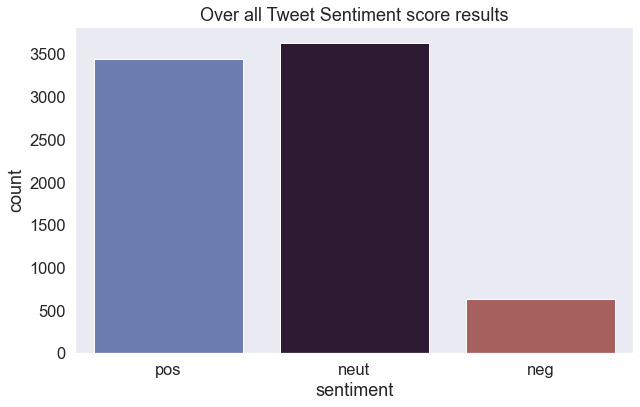

In [73]:
plt.figure(figsize=(8,6))

fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

plt.figure(figsize=(10,6))
sns.set_context(context='notebook',font_scale=1.5)
sns.countplot(data['sentiment'],palette='twilight')
plt.title('Over all Tweet Sentiment score results');

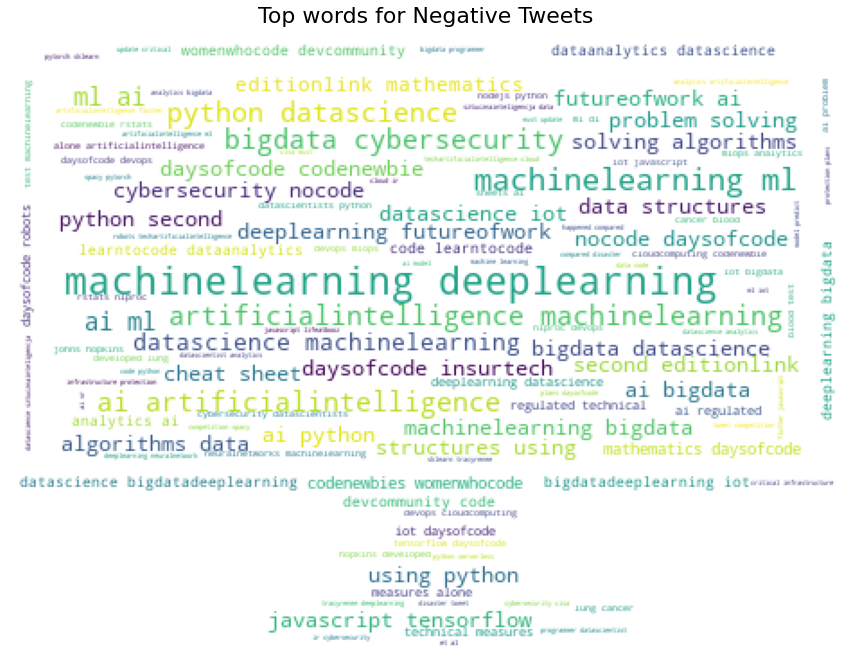

In [35]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

twitter_mask = np.array(Image.open(path.join(d, "monitor.png")))

wc = WordCloud(
    background_color='white', 
    max_words=500, 
    mask = twitter_mask
)
wc.generate(' '.join(text for text in data.loc[data['sentiment'] == 'neg', 'text']))
plt.figure(figsize=(15,15))
plt.title('Top words for Negative Tweets', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

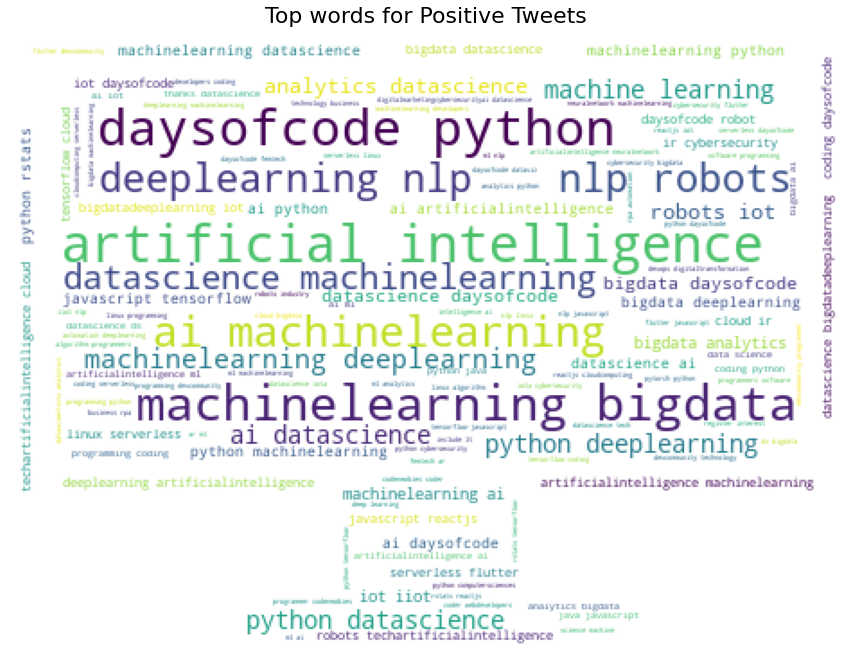

In [38]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

twitter_mask = np.array(Image.open(path.join(d, "monitor.png")))

wc = WordCloud(
    background_color='white', 
    max_words=3000, 
    mask = twitter_mask,
)
wc.generate(' '.join(text for text in data.loc[data['sentiment'] == 'pos', 'text']))
plt.figure(figsize=(15,15))
plt.title('Top words for Positive Tweets', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

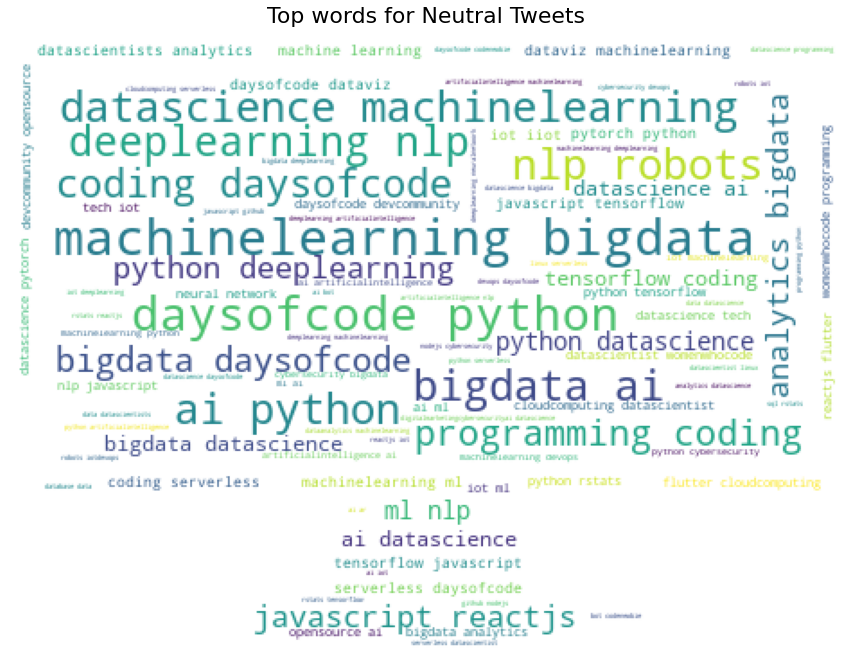

In [44]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

twitter_mask = np.array(Image.open(path.join(d, "monitor.png")))

wc = WordCloud(
    background_color='white', 
    max_words=500, 
    mask = twitter_mask
)
wc.generate(' '.join(text for text in data.loc[data['sentiment'] == 'neut', 'text']))
plt.figure(figsize=(15,15))
plt.title('Top words for Neutral Tweets', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

In [42]:
words=[]
    
for index, row in Positive_tweet.iterrows():
    words.append(row['text'].split())
    
all_positive_words=[]
def removeNestings(l):
    for i in l:
        if type(i) == list:
            removeNestings(i)
        else:
            all_positive_words.append(i)  
            
removeNestings(words)    

all_positive_words=pd.Series(np.array(all_positive_words))
common_words=all_positive_words.value_counts()[:70].rename_axis('Common Positive Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Positive Words'], values='count',title='70 Most Common Words In Positive Tweets')
fig.show()

In [45]:
words=[]
for index, row in Negative_tweet.iterrows():
    words.append(row['text'].split())
    
    
all_negative_words=[]
def removeNestings(l):
    for i in l:
        if type(i) == list:
            removeNestings(i)
        else:
            all_negative_words.append(i)  
            
removeNestings(words)    

all_negative_words=pd.Series(np.array(all_negative_words))
common_words=all_negative_words.value_counts()[:70].rename_axis('Common Negative Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Negative Words'], values='count',title='70 Most Common Words In Negative Tweets')
fig.show()

In [46]:
words=[]
for index, row in Neutral_tweet.iterrows():
    words.append(row['text'].split())
    
    
all_neutral_words=[]
def removeNestings(l):
    for i in l:
        if type(i) == list:
            removeNestings(i)
        else:
            all_neutral_words.append(i)  
            
removeNestings(words)    

all_neutral_words=pd.Series(np.array(all_neutral_words))
common_words=all_neutral_words.value_counts()[:70].rename_axis('Common neutral Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common neutral Words'], values='count',title='70 Most Common Words In neutral Tweets')
fig.show()

In [49]:
common=set(all_positive_words).intersection(set(all_negative_words)).intersection(set(all_neutral_words))
common_list=list(common)

common_words=all_negative_words.value_counts().drop(labels=common_list)[:50].rename_axis('Common Negative Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Negative Words'], values='count',title='Top 50 Unique Words In Negative Tweets')
fig.show()
common_words=all_positive_words.value_counts().drop(labels=common_list)[:50].rename_axis('Common Positive Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Positive Words'], values='count',title='Top 50 Unique Words In Positive Tweets')
fig.show()
common_words=all_neutral_words.value_counts().drop(labels=common_list)[:30].rename_axis('Common Neutral Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Neutral Words'], values='count',title='Top 50 Unique Words In Neutral Tweets')
fig.show()

In [53]:
import nltk
from nrclex import NRCLex

from nltk.corpus import stopwords

In [54]:
data['text'] = data['text'].str.strip()

In [55]:

def emo_tweet(word):
    word = [word for word in word if word not in stopwords.words('english')]
    word = str([cell.encode('utf-8') for cell in word])# to convert the text into utf-8 unicode
    str_text = NRCLex(word) 
    str_text = str_text.raw_emotion_scores
    str_text = pd.DataFrame(str_text,index=[0])
    str_text = pd.melt(str_text)
    str_text.columns = ('Emotions','Count')
    str_text = str_text.sort_values('Count')
    return str_text

In [56]:
Overall_tweet_emo = emo_tweet(data['text'])

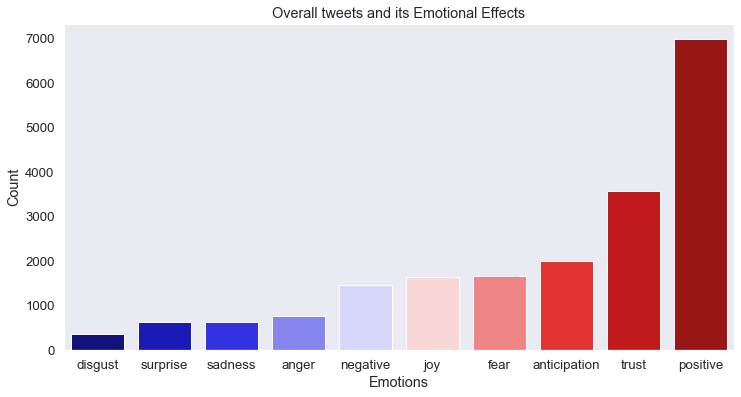

In [76]:
plt.figure(figsize=(12,6))
plt.title('Overall tweets and its Emotional Effects')
sns.set_style('dark')
sns.set_context(context='notebook',font_scale=1.2)
sns.barplot(x='Emotions',y='Count',data = Overall_tweet_emo[0:],palette='seismic');